In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Crop_recommendation (1).csv")

# Display the first few rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("Crop_recommendation (1).csv")

# Simulate crop failure: assume yield < threshold for some crops = failure (binary label)
import numpy as np
df['failure'] = np.where((df['rainfall'] < 60) | (df['ph'] < 5.5) | (df['humidity'] < 45), 1, 0)

# Features and label
X = df.drop(['label', 'failure'], axis=1)
y = df['failure']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# RandomForestClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


In [4]:
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


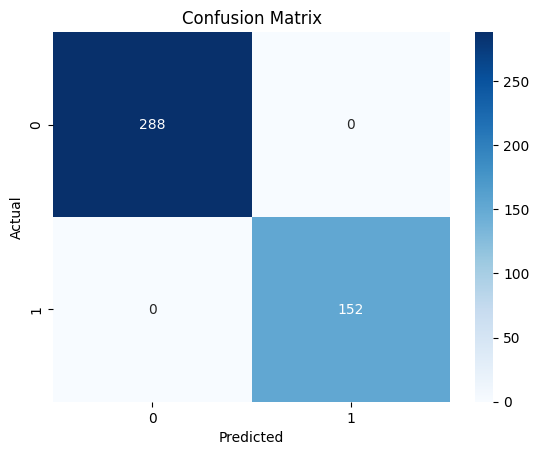

In [5]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [6]:
#evaluating  performance on the test set
# Predict on test set
y_test_pred = clf.predict(X_test)

# Evaluate TESTING performance
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test F1-score: {test_f1:.2f}")


Test Accuracy: 1.00
Test F1-score: 1.00


# Logistic Regression Algorithm

In [7]:
# Another Algortihm... Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model, Replace RandomForestClassifier with LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

In [8]:
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.87
Precision: 0.80
Recall: 0.83
F1-score: 0.81


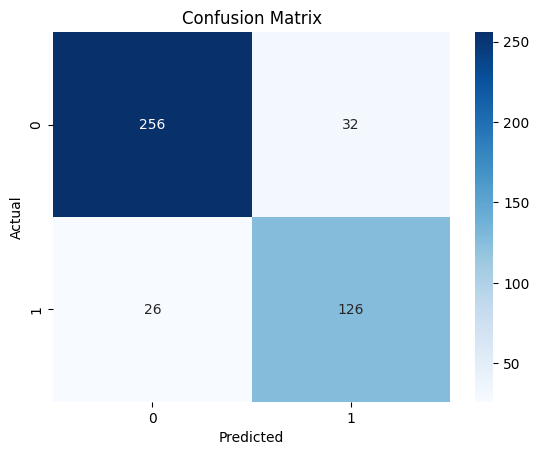

In [9]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Handling Overfitting


In [ ]:

# Evaluate on Training Data (Logistic Regression)
print("\nMetrics on Training Data (Logistic Regression):")
y_train_pred_lr = clf.predict(X_train) # Use the Logistic Regression model

acc_train_lr = accuracy_score(y_train, y_train_pred_lr)
prec_train_lr = precision_score(y_train, y_train_pred_lr)
rec_train_lr = recall_score(y_train, y_train_pred_lr)
f1_train_lr = f1_score(y_train, y_train_pred_lr)

print(f"Accuracy (Train): {acc_train_lr:.2f}")
print(f"Precision (Train): {prec_train_lr:.2f}")
print(f"Recall (Train): {rec_train_lr:.2f}")
print(f"F1-score (Train): {f1_train_lr:.2f}")


Metrics on Training Data (Logistic Regression):
Accuracy (Train): 0.88
Precision (Train): 0.83
Recall (Train): 0.86
F1-score (Train): 0.84


In [11]:
# Apply Cross-Validation.... To see if it works consistently or was just lucky on the first test.
from sklearn.model_selection import cross_validate

# Perform cross-validation (Logistic Regression)
# We'll use 5 folds (cv=5) and evaluate accuracy, precision, recall, and f1-score
print("\nCross-Validation Results (5-fold for Logistic Regression):")
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results_lr = cross_validate(clf, X_scaled, y, cv=5, scoring=scoring) # Use the Logistic Regression model

# Print the average scores across all folds
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_results_lr[f'test_{metric}'].mean():.2f} (+/- {cv_results_lr[f'test_{metric}'].std():.2f})")


Cross-Validation Results (5-fold for Logistic Regression):
Accuracy: 0.65 (+/- 0.27)
Precision: 0.71 (+/- 0.33)
Recall: 0.50 (+/- 0.34)
F1: 0.49 (+/- 0.35)


# Handling Overfitting 
- Adding Regularization

In [12]:
# Add regularization to the Logistic Regression model to see 
# To make it predict well on new stuff, not just the data it learned from

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
# We will use Logistic Regression with regularization
# Add regularization by setting the 'C' parameter
# A smaller C means stronger regularization
clf = LogisticRegression(random_state=42, C=0.1) # Example: reducing C to 0.1
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

In [13]:
# %%
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.86
Precision: 0.79
Recall: 0.82
F1-score: 0.80


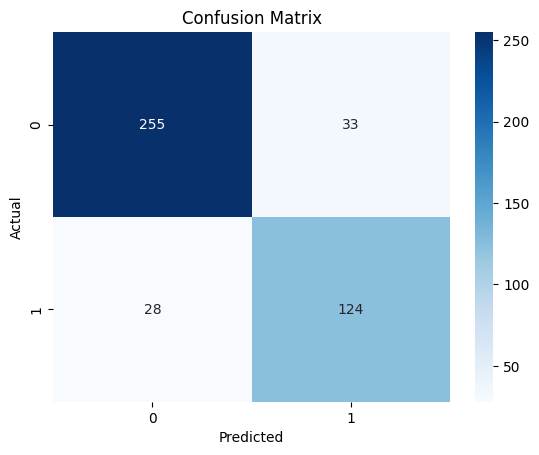

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:

# Evaluate on Training Data (Logistic Regression)
print("\nMetrics on Training Data (Logistic Regression):")
y_train_pred_lr = clf.predict(X_train) # Use the Logistic Regression model

acc_train_lr = accuracy_score(y_train, y_train_pred_lr)
prec_train_lr = precision_score(y_train, y_train_pred_lr)
rec_train_lr = recall_score(y_train, y_train_pred_lr)
f1_train_lr = f1_score(y_train, y_train_pred_lr)

print(f"Accuracy (Train): {acc_train_lr:.2f}")
print(f"Precision (Train): {prec_train_lr:.2f}")
print(f"Recall (Train): {rec_train_lr:.2f}")
print(f"F1-score (Train): {f1_train_lr:.2f}")


Metrics on Training Data (Logistic Regression):
Accuracy (Train): 0.88
Precision (Train): 0.83
Recall (Train): 0.86
F1-score (Train): 0.84


In [16]:

from sklearn.model_selection import cross_validate

# Perform cross-validation (Logistic Regression)
# We'll use 5 folds (cv=5) and evaluate accuracy, precision, recall, and f1-score
print("\nCross-Validation Results (5-fold for Logistic Regression):")
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results_lr = cross_validate(clf, X_scaled, y, cv=5, scoring=scoring) # Use the Logistic Regression model

# Print the average scores across all folds
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_results_lr[f'test_{metric}'].mean():.2f} (+/- {cv_results_lr[f'test_{metric}'].std():.2f})")


Cross-Validation Results (5-fold for Logistic Regression):
Accuracy: 0.65 (+/- 0.27)
Precision: 0.50 (+/- 0.38)
Recall: 0.51 (+/- 0.34)
F1: 0.49 (+/- 0.34)


c:\Users\Tshupsane\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Handling Overfitting
- Tuned Logistic Regression

In [17]:
# Tune the Logistic Regression model using Grid Search to find the best regularization parameter (C)
# To see how good it is in a real situation.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} # Example range of C values

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
# We'll optimize for F1-score
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters found by Grid Search:")
print(grid_search.best_params_)
print("\nBest cross-validation F1-score:")
print(grid_search.best_score_)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set (optional)
print("\nMetrics on Test Data with Best Logistic Regression Model:")
y_pred_best_logreg = best_logreg_model.predict(X_test)

acc_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
prec_best_logreg = precision_score(y_test, y_pred_best_logreg)
rec_best_logreg = recall_score(y_test, y_pred_best_logreg)
f1_best_logreg = f1_score(y_test, y_pred_best_logreg)

print(f"Accuracy: {acc_best_logreg:.2f}")
print(f"Precision: {prec_best_logreg:.2f}")
print(f"Recall: {rec_best_logreg:.2f}")
print(f"F1-score: {f1_best_logreg:.2f}")


Best parameters found by Grid Search:
{'C': 10}

Best cross-validation F1-score:
0.8409121357916604

Metrics on Test Data with Best Logistic Regression Model:
Accuracy: 0.87
Precision: 0.80
Recall: 0.83
F1-score: 0.81



Best parameters found by Grid Search (Expanded Range):
{'C': 10}

Best cross-validation F1-score (Expanded Range):
0.8409121357916604

Metrics on Test Data with Best Tuned Logistic Regression Model:
Accuracy: 0.87
Precision: 0.80
Recall: 0.83
F1-score: 0.81

Metrics on Training Data with Best Tuned Logistic Regression Model:
Accuracy (Train): 0.88
Precision (Train): 0.83
Recall (Train): 0.86
F1-score (Train): 0.85

Confusion Matrix for Best Tuned Logistic Regression Model:


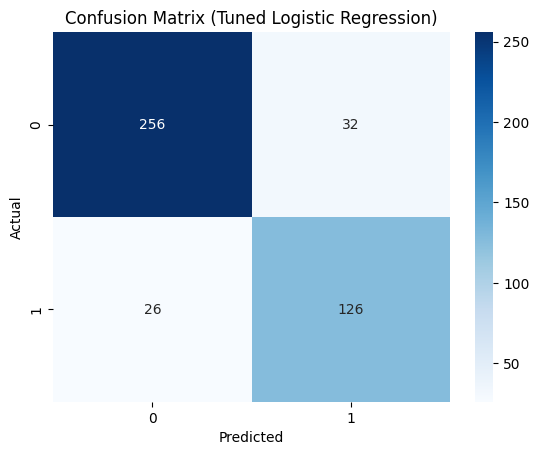

In [18]:
# Evaluate the best model on the training set to check for overfitting
# To confirm it learned well but didn't just memorize everything (not overfitting)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define an expanded parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100, 500, 1000]} # Expanded range

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence with larger C

# Initialize GridSearchCV (optimizing for F1-score)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters found by Grid Search (Expanded Range):")
print(grid_search.best_params_)
print("\nBest cross-validation F1-score (Expanded Range):")
print(grid_search.best_score_)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
print("\nMetrics on Test Data with Best Tuned Logistic Regression Model:")
y_pred_best_logreg = best_logreg_model.predict(X_test)

acc_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
prec_best_logreg = precision_score(y_test, y_pred_best_logreg)
rec_best_logreg = recall_score(y_test, y_pred_best_logreg)
f1_best_logreg = f1_score(y_test, y_pred_best_logreg)

print(f"Accuracy: {acc_best_logreg:.2f}")
print(f"Precision: {prec_best_logreg:.2f}")
print(f"Recall: {rec_best_logreg:.2f}")
print(f"F1-score: {f1_best_logreg:.2f}")

# Evaluate the best model on the training set to check for overfitting
print("\nMetrics on Training Data with Best Tuned Logistic Regression Model:")
y_train_pred_best_logreg = best_logreg_model.predict(X_train)

acc_train_best_logreg = accuracy_score(y_train, y_train_pred_best_logreg)
prec_train_best_logreg = precision_score(y_train, y_train_pred_best_logreg)
rec_train_best_logreg = recall_score(y_train, y_train_pred_best_logreg)
f1_train_best_logreg = f1_score(y_train, y_train_pred_best_logreg)

print(f"Accuracy (Train): {acc_train_best_logreg:.2f}")
print(f"Precision (Train): {prec_train_best_logreg:.2f}")
print(f"Recall (Train): {rec_train_best_logreg:.2f}")
print(f"F1-score (Train): {f1_train_best_logreg:.2f}")


# Display the confusion matrix for the best tuned model
print("\nConfusion Matrix for Best Tuned Logistic Regression Model:")
cm_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
sns.heatmap(cm_best_logreg, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Tuned Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Overfitting has been resolved through hyperparameter tuning.

 Based on the evaluation of the tuned Logistic Regression model with C=10:

The performance metrics on the training data are very close to the metrics on the Unseen test data
- (Accuracy: 0.88, Precision: 0.83, Recall: 0.86, F1-score: 0.85) 
- (Accuracy: 0.87, Precision: 0.80, Recall: 0.83, F1-score: 0.81).

This small gap between training and test performance, along with the consistent cross-validation F1-score of 0.84, indicates that the model is not severely overfitting the training data.
The hyperparameter tuning process, guided by cross-validation, successfully found a regularization strength (C=10) that allowed the model to learn the patterns in the data effectively without memorizing noise, thus addressing the potential for overfitting that might exist with different parameter settings or more complex models.
The tuned Logistic Regression model demonstrates good generalization ability, achieving an F1-score of approximately 0.81 on unseen data, providing a reliable predictor for crop failure within the context of this dataset and synthetic label."